In [8]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
import time

In [9]:
# using unverfied ssl
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [10]:
# load train and test data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X = np.concatenate((X_train,X_test))
y = np.concatenate((Y_train,Y_test))



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=1234)
X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, test_size=0.5)

print('X_train, y_train :', X_train.shape, y_train.shape)
print('X_valid, y_valid:', X_valid.shape, y_valid.shape)
print('X_test, y_test:', X_valid.shape, y_valid.shape)

X_train, y_train : (50000, 32, 32, 3) (50000, 1)
X_valid, y_valid: (5000, 32, 32, 3) (5000, 1)
X_test, y_test: (5000, 32, 32, 3) (5000, 1)


In [11]:
# Encoding the class values to 10 value binary vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

# Converting the train values to float 
X_train_norm = X_train.astype('float32')
X_valid_norm = X_valid.astype('float32')
X_test_norm = X_test.astype('float32')
# normalize the images with mean 0 and standard deviation of 1
X_train_norm = X_train_norm / 255.0
X_valid_norm = X_valid_norm / 255.0
X_test_norm = X_test_norm / 255.0

In [12]:
def plot_learning_curves(history):
    # plot loss
    plt.subplot(211)
    plt.title('Minibatch Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='green', label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='green', label='validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# variant 4 - Having only the convolutional layers with out dense layers

In [13]:
from tensorflow.keras.layers import  GlobalAveragePooling2D

def train_vgg_model_only_cnn():
    
    model = Sequential()
    
    #conv block 1
    model.add(Conv2D(64, (3, 3), activation='relu',   padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu',   padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
        
    #conv block 2
    model.add(Conv2D(128, (3, 3), activation='relu',   padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
        
    #conv block 3
    model.add(Conv2D(256, (3, 3), activation='relu',   padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu',   padding='same'))
    model.add(BatchNormalization())
      
    # conv block 4
    model.add(Conv2D(128, (1, 1), activation='relu',  padding='same'))
    model.add(Conv2D(10, (1, 1),   padding='same'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(10, activation='softmax'))
    

    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    print(model.summary())
    
    return model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 128)      

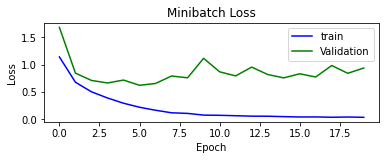

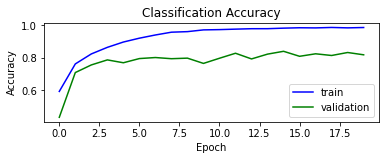

In [14]:
start_time = time.time()

train_model = train_vgg_model_only_cnn()
history = train_model.fit(X_train_norm, y_train , epochs=20, batch_size=100 , validation_data=(X_valid_norm, y_valid), verbose=0)

elapsed = (time.time() - start_time)/60
print(f'Total Training Time: {elapsed:.2f} min')

# evaluate model
scores = train_model.evaluate(X_test_norm, y_test, verbose=0)
print('\nTest result: %.3f loss: %.3f'  % (scores[1]*100,scores[0]))

print('Traing loss', history.history['loss'],'\nvalidation Loss', history.history['val_loss'])
print('Traing accuracy', history.history['accuracy'], '\nvalidation Accuracy', history.history['val_accuracy'])

# learning curves
plot_learning_curves(history)